<a href="https://colab.research.google.com/github/radovan-pranda/MAD4/blob/master/MAD4_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis 4 - Project
Analysis of dataset : 
ASL - url: https://www.kaggle.com/grassknoted/asl-alphabet

[Google Collab](https://colab.research.google.com/drive/1cubYY0d1o79vd-hgDLeNsiwiZCApEkYk) | [GitHub repository](https://github.com/radovan-pranda/MAD4)



In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from requests import get  # to make GET request
import pickle
import zipfile
import os
import shutil
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
import matplotlib.image as mpimg 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from scipy.signal import convolve2d
import PIL
from keras.callbacks import EarlyStopping

print(tf.version.VERSION)

2.2.0-rc3


Using TensorFlow backend.


Mount Google drive:
You can download preprocessed data [here](https://drive.google.com/open?id=14JOr3DXm28LxUnXb249d-wrRSd3XR1VL).

[Import this directory to your Google drive (only if you want to use this script in playground mode)](https://drive.google.com/drive/folders/1gz5dH8nfDPXKA1KFzWAxWn7GhkxsKWuQ?usp=sharing)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def extractZip(source, destination_folder):
  with zipfile.ZipFile(source) as ZIP:
    ZIP.extractall(destination_folder)
  print('Export finished ...')

def show_history(history):
  plt.figure()
  for key in history.history.keys():
    plt.plot(history.epoch, history.history[key], label=key)
  plt.legend()
  plt.tight_layout()

def show_example(train_x, train_y, class_names, grid_size):
  plt.figure(figsize=(10,10))
  for i in range(grid_size*grid_size):
    plt.subplot(grid_size,grid_size,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    j = randint(0,len(train_x))
    plt.imshow(train_x[j], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[j]])
  plt.show()


def rgb2gray(rgb):
  return np.dot(rgb[...,:3],[0.2989, 0.5870, 0.1140])

In [4]:
extractZip('/content/drive/My Drive/MAD4/data/asl_alphabet_train.zip', '/content/data/')

Export finished ...


# **Preprocessing**

1.   whole dataset - [Download](https://drive.google.com/open?id=1-0yjATtDj2_Uf5m0F6Pwbo6QLd5TWC_s)

In [5]:
data_folder_path = '/content/data'
destination_file = '/content/whole_dataset.csv'

folders = os.listdir(data_folder_path)
f= open(destination_file,"w+")
categories = {}

for folder in sorted(folders):
  if folder.find('.jpg') == -1:
    pics = os.listdir('{}/{}'.format(data_folder_path, folder))
    categories[folder] = 0
    for pic in pics:
      #print("Picture: {}".format(pic))
      categories[folder] = categories[folder] + 1
      f.write("{}/{}/{},{}\n".format(data_folder_path,folder,pic,folder))

print('Total no. of files: {}'.format(str(sum(categories.values()))))
print('Categories: {}'.format(str(list(categories))))

Total no. of files: 87000
Categories: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


2. sample (1/3 of dataset, 2/3 of dataset) - [1/3 Download](https://drive.google.com/open?id=1UsGYXL7dqzoykP97Ezz_-URZhF36iz8M) & [2/3 Download](https://drive.google.com/open?id=10cyjd5jdl61MZxYrhlCDDWzCqKhnTkrd)

In [6]:
data_folder_path = '/content/data'
destination_file_train = '/content/train_sample_1.csv'
destination_file_test = '/content/test_sample_1.csv'

folders = os.listdir(data_folder_path)
train = open(destination_file_train,"w+")
test = open(destination_file_test,"w+")

categories_train = {}
categories_test = {}

for folder in sorted(folders):
  if folder.find('.jpg') == -1:
    pics = os.listdir('{}/{}'.format(data_folder_path, folder))
    categories_train[folder] = 0
    categories_test[folder] = 0
    i = 0
    for pic in pics:
      #print("Picture: {}".format(pic))
      if (i % 3 > 0):
        categories_train[folder] = categories_train[folder] + 1
        train.write("{}/{}/{},{}\n".format(data_folder_path,folder,pic,folder))
      else:
        categories_test[folder] = categories_test[folder] + 1
        test.write("{}/{}/{},{}\n".format(data_folder_path,folder,pic,folder))

      i = i + 1

print('Total no. of files: \n TRAIN: {} \n TEST: {}'.format(str(sum(categories_train.values())), str(sum(categories_test.values()))))

Total no. of files: 
 TRAIN: 58000 
 TEST: 29000


# **Analysis**

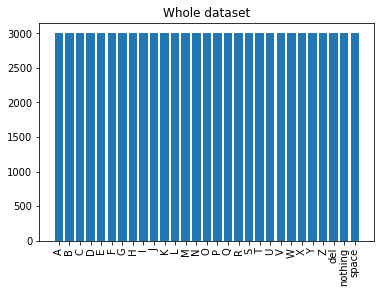

In [7]:
plt.bar(list(categories.keys()), categories.values())
plt.xticks(rotation=90)
plt.title('Whole dataset')
plt.show()

Load 2/3 (train part) of dataset:

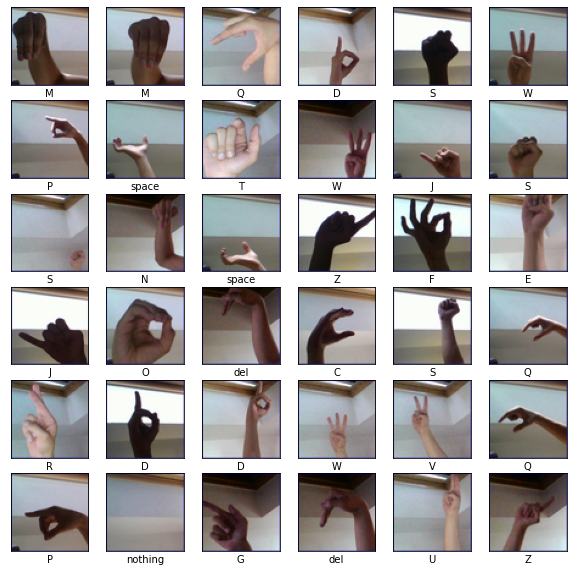

In [8]:
csvReader = []
classnames = []
train_x = []
train_y = []

def preprocimg(img):
  blur_mask = np.ones((3,3))/300.0

  mask = np.array([[ -1, -1, -1], [ -1, 8, -1], [ -1, -1, -1] ]) 
  img_blur = convolve2d(img, blur_mask, boundary='symm', mode='same')
  return np.clip(convolve2d(img_blur, mask, boundary='symm', mode='same'), 0, 1)


with open(destination_file_train) as csvDataFile:
    for row in csv.reader(csvDataFile):
      csvReader.append(row)

    for i in csvReader:
      if i[1] not in classnames:
        classnames.append(i[1])
        i[1] = classnames.index(i[1])

      else:
        i[1] = classnames.index(i[1])

      img = PIL.Image.open(i[0])
      #hpercent = (100 / float(img.size[1]))
      #wsize = int((float(img.size[0]) * float(hpercent)))
      img = img.resize((64, 64), PIL.Image.ANTIALIAS)
      #img.save(i[0])
      i[0] = img
      #i[0] = np.array(mpimg.imread(i[0]))
    
    show_example([pic[0] for pic in csvReader], [pic[1] for pic in csvReader], classnames, 6)
    train_x = np.array([np.array(pic[0]) for pic in csvReader])#[preprocimg(rgb2gray(np.array(pic[0]))) for pic in csvReader])
    train_y = np.array([pic[1] for pic in csvReader])

del csvReader

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

Preprocessed image 
- edge detection filter
- normalization
- grayscale

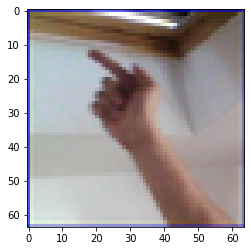

In [9]:
plt.imshow(train_x[2], cmap='gray')

Load 1/3 of dataset for testing

In [0]:
csvReader = []
test_x = []
test_y = []

with open(destination_file_test) as csvDataFile:
    for row in csv.reader(csvDataFile):
      csvReader.append(row)

    for i in csvReader:
      i[1] = classnames.index(i[1])
      img = PIL.Image.open(i[0])
      #hpercent = (100 / float(img.size[1]))
      #wsize = int((float(img.size[0]) * float(hpercent)))
      img = img.resize((64, 64), PIL.Image.ANTIALIAS)
      i[0] = np.array(img)#preprocimg(rgb2gray(np.array(img)))
      #img.save(i[0])

    test_x = np.array([pic[0] for pic in csvReader])
    test_y = np.array([pic[1] for pic in csvReader])

del csvReader

In [11]:
print('Train data shape: ', train_x.shape, train_y.shape)
print('Validation data shape: ', valid_x.shape, valid_y.shape)
print('Test data shape:  ', test_x.shape, test_y.shape)

Train data shape:  (46390, 64, 64, 3) (46390,)
Validation data shape:  (11598, 64, 64, 3) (11598,)
Test data shape:   (28991, 64, 64, 3) (28991,)


# Create model

In [17]:
model = keras.Sequential([
  keras.layers.Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)),
  keras.layers.Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'),
  keras.layers.MaxPool2D(pool_size = [3,3]),
  keras.layers.Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'),
  keras.layers.Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'),
  keras.layers.MaxPool2D(pool_size = [3,3]),
  keras.layers.Flatten(),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(29, activation = 'softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

# NN fitting

Epoch 1/50
1450/1450 [==============================] - 8s 5ms/step - loss: 1.7330 - accuracy: 0.5309 - val_loss: 0.4117 - val_accuracy: 0.8739
Epoch 2/50
1450/1450 [==============================] - 8s 6ms/step - loss: 0.4015 - accuracy: 0.8646 - val_loss: 0.1156 - val_accuracy: 0.9661
Epoch 3/50
1450/1450 [==============================] - 8s 5ms/step - loss: 0.2182 - accuracy: 0.9259 - val_loss: 0.0807 - val_accuracy: 0.9762
Epoch 4/50
1450/1450 [==============================] - 8s 5ms/step - loss: 0.1650 - accuracy: 0.9447 - val_loss: 0.0879 - val_accuracy: 0.9690
Epoch 5/50
1450/1450 [==============================] - 8s 6ms/step - loss: 0.1519 - accuracy: 0.9518 - val_loss: 0.0225 - val_accuracy: 0.9949
Epoch 6/50
1450/1450 [==============================] - 8s 5ms/step - loss: 0.1283 - accuracy: 0.9584 - val_loss: 0.0303 - val_accuracy: 0.9904
Epoch 7/50
1450/1450 [==============================] - 8s 5ms/step - loss: 0.1199 - accuracy: 0.9617 - val_loss: 0.0335 - val_accuracy:

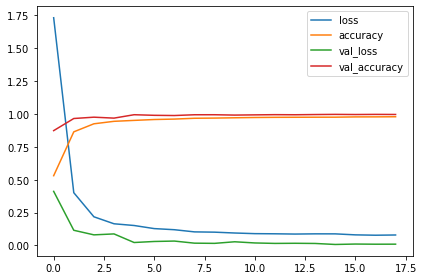

In [18]:
history = model.fit(train_x, train_y, validation_data=(valid_x, valid_y), callbacks=[earlyStop], epochs=50)

show_history(history)

test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy: ', test_acc)

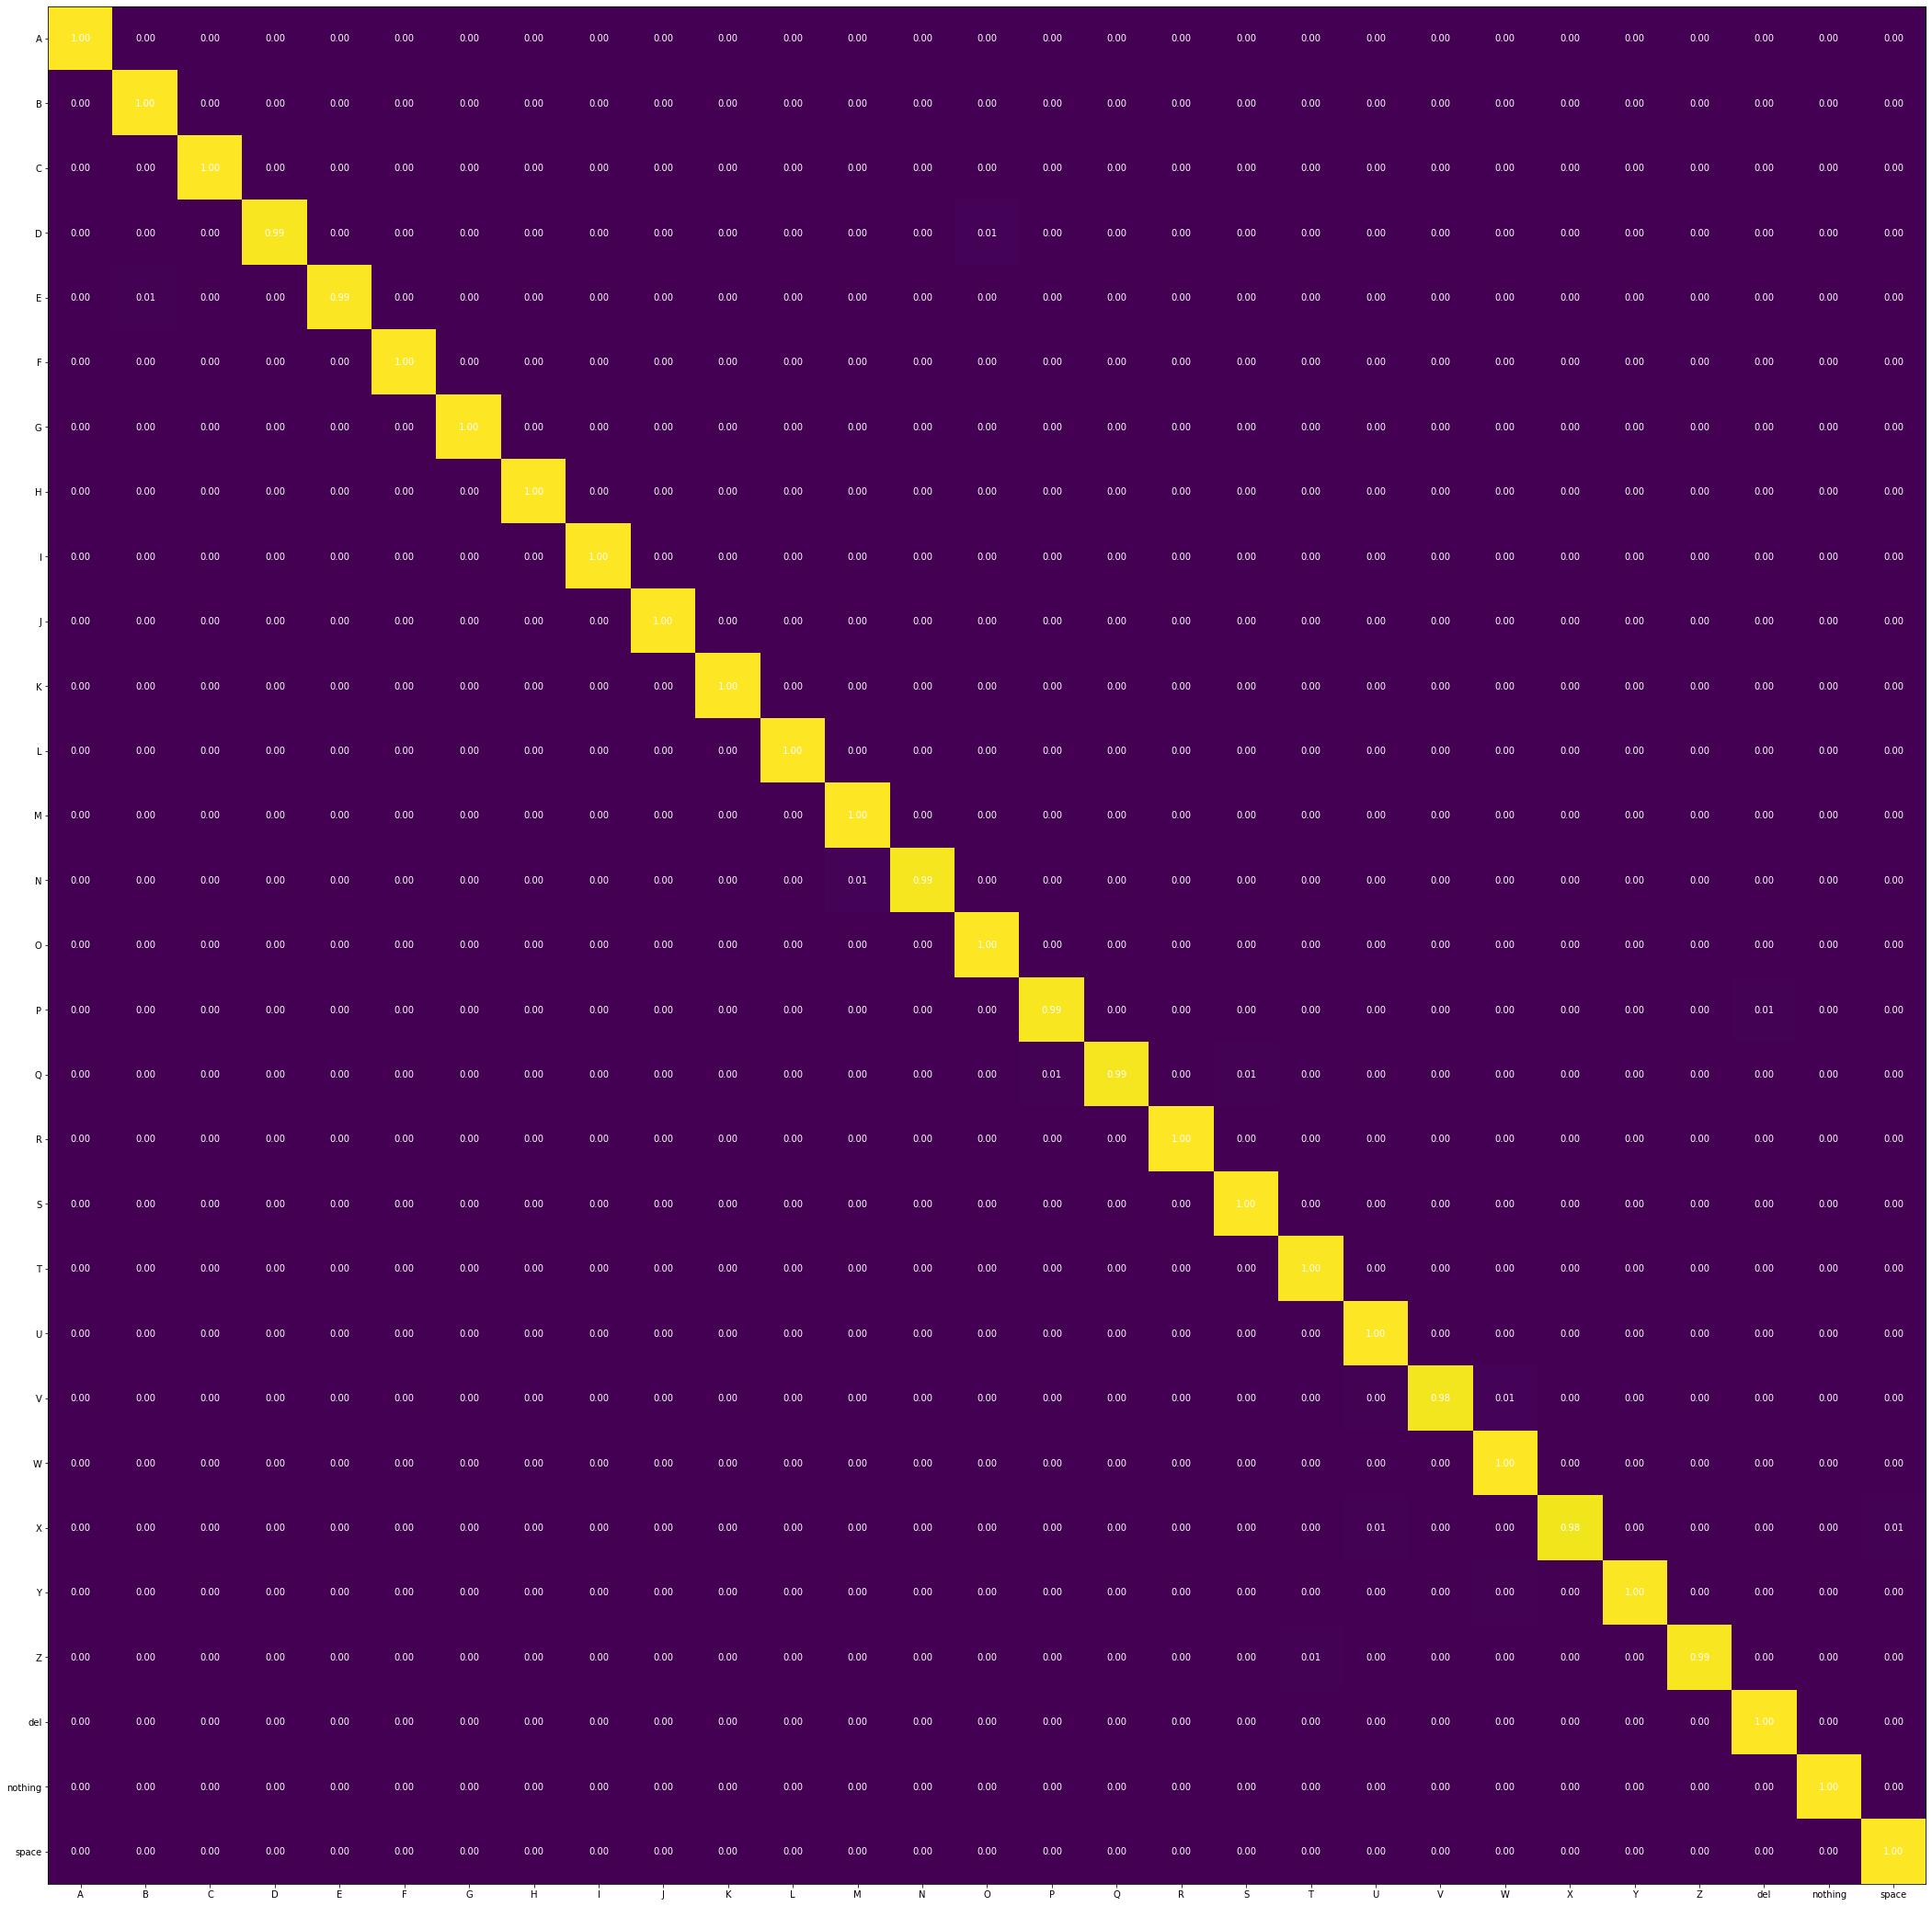

In [24]:
predictions = model.predict(test_x)
conf_matrix = np.zeros((len(classnames), len(classnames)))
for idx, pred in enumerate(predictions):
    row = test_y[idx]
    col = np.argmax(pred)
    conf_matrix[row, col] += 1

# print(conf_matrix)
conf_matrix = normalize(conf_matrix, axis=1, norm='l1')
# print(conf_matrix)

plt.figure(figsize=(len(classnames),len(classnames)))

plt.imshow(conf_matrix)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        text = plt.text(j, i, "{:.2f}".format(conf_matrix[i, j]), ha="center", va="center", color="w")

plt.xticks(range(len(classnames)), classnames)
plt.yticks(range(len(classnames)), classnames)

plt.tight_layout()
plt.show()     

In [0]:
# save weights -> google drive
model.save_weights("/content/drive/My Drive/MAD4/bestModel_weights.h5")

In [32]:
# save whole model -> google drive
model.save("/content/drive/My Drive/MAD4/best_model_keras")

INFO:tensorflow:Assets written to: /content/drive/My Drive/MAD4/best_model_keras/assets


# Tests with filters

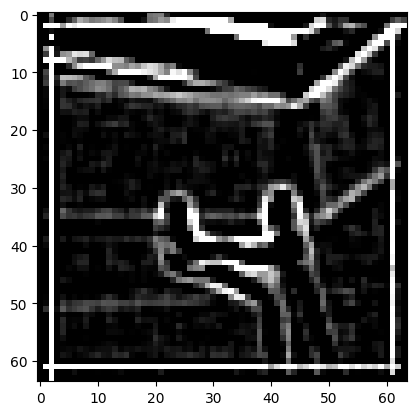

In [0]:
blur_mask = np.ones((3,3))/300.0

mask = np.array([
    [ -1, -1, -1],
    [ -1, 8, -1],
    [ -1, -1, -1]
    ]) 


img = train_x[4]
img_blur = convolve2d(img, blur_mask, boundary='symm', mode='same')
result = np.clip(convolve2d(img_blur, mask, boundary='symm', mode='same'), 0, 1)

plt.imshow(result, cmap='gray')